In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import os
import imageio
import re

# define path
paths = sorted(glob.glob(os.path.join('./generated_data', '*partseg.png')))[:10]
global_animal = 'tiger'

visualize annotations for image:  ./generated_data/0_SK_tiger_tiger_attackB_anim_0.50_200.00_320.00_20.00.png_partseg.png


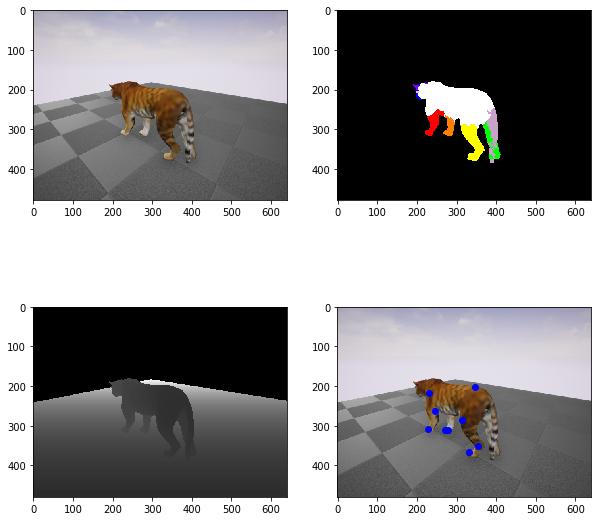

visualize annotations for image:  ./generated_data/1_SK_tiger_tiger_idleB_anim_0.85_350.00_290.00_20.00.png_partseg.png


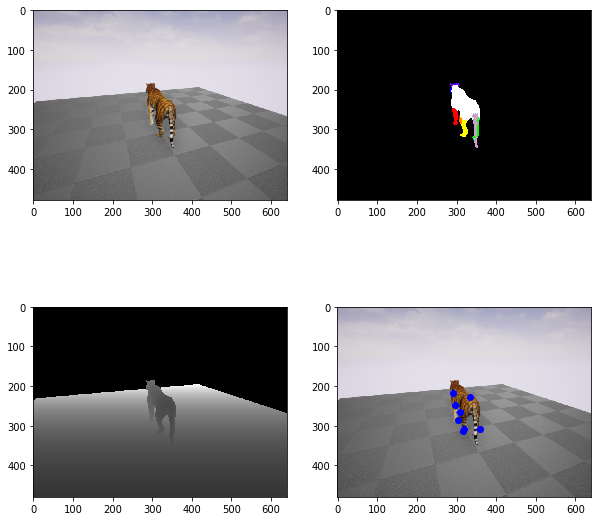

visualize annotations for image:  ./generated_data/2_SK_tiger_tiger_eat_anim_0.15_300.00_170.00_20.00.png_partseg.png


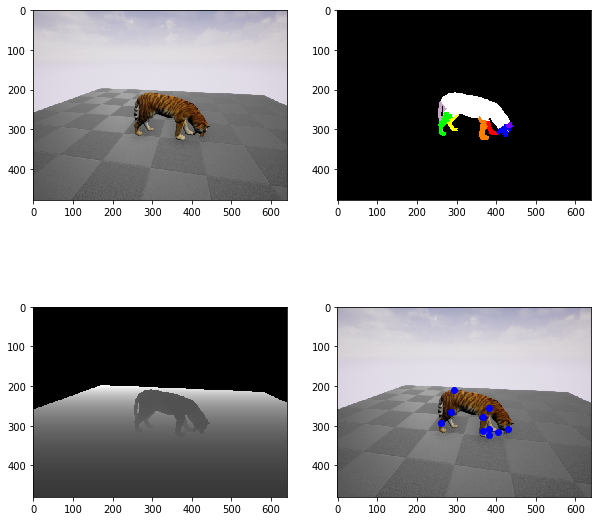

visualize annotations for image:  ./generated_data/3_SK_tiger_tiger_attackB_anim_0.30_300.00_110.00_170.00.png_partseg.png


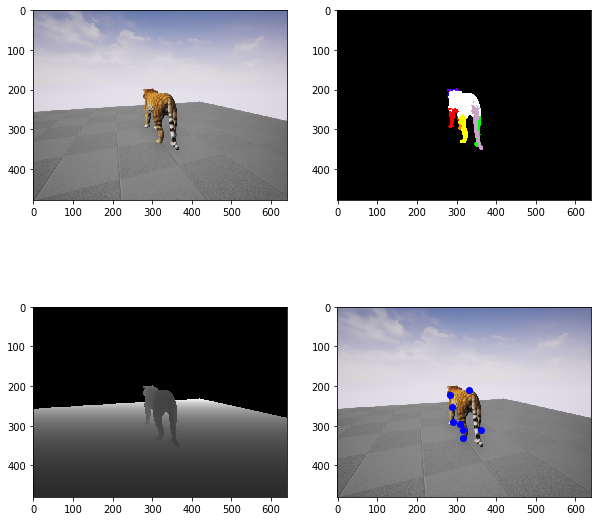

visualize annotations for image:  ./generated_data/4_SK_tiger_tiger_run_anim_0.70_350.00_220.00_10.00.png_partseg.png


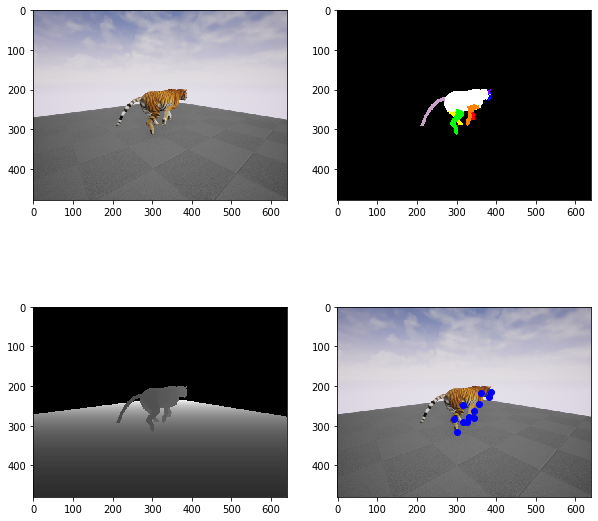

visualize annotations for image:  ./generated_data/5_SK_tiger_tiger_idleA_anim_0.15_350.00_220.00_170.00.png_partseg.png


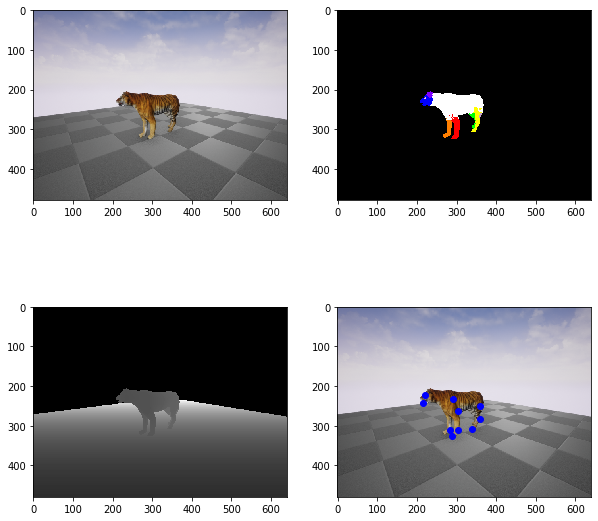

visualize annotations for image:  ./generated_data/6_SK_tiger_tiger_death_anim_0.75_250.00_330.00_10.00.png_partseg.png


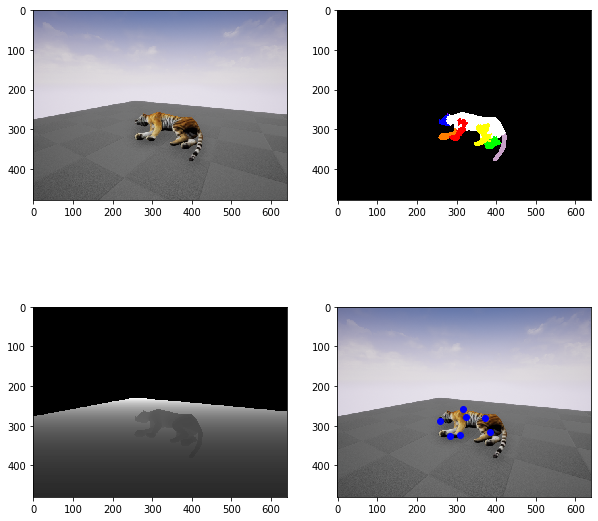

visualize annotations for image:  ./generated_data/7_SK_tiger_tiger_attackB_anim_0.40_250.00_120.00_160.00.png_partseg.png


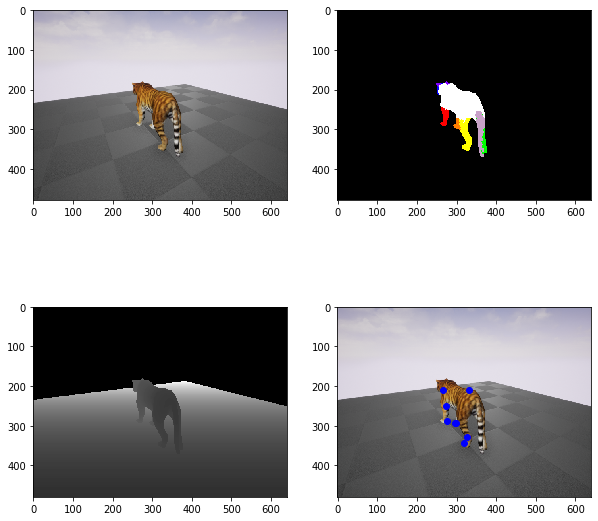

visualize annotations for image:  ./generated_data/8_SK_tiger_tiger_roar_anim_0.40_200.00_180.00_0.00.png_partseg.png


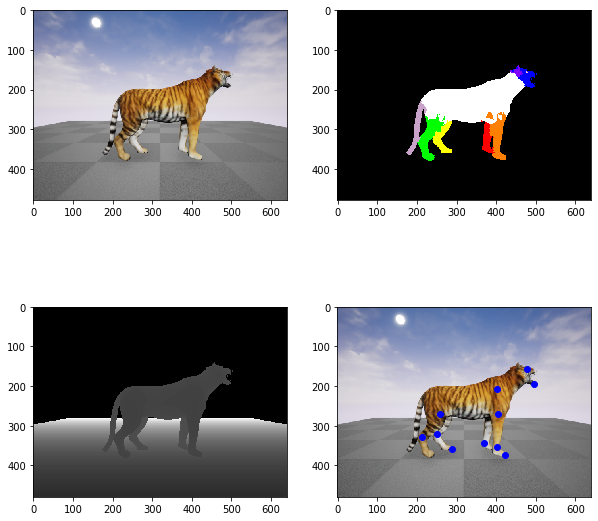

visualize annotations for image:  ./generated_data/9_SK_tiger_tiger_death_anim_0.25_200.00_270.00_180.00.png_partseg.png


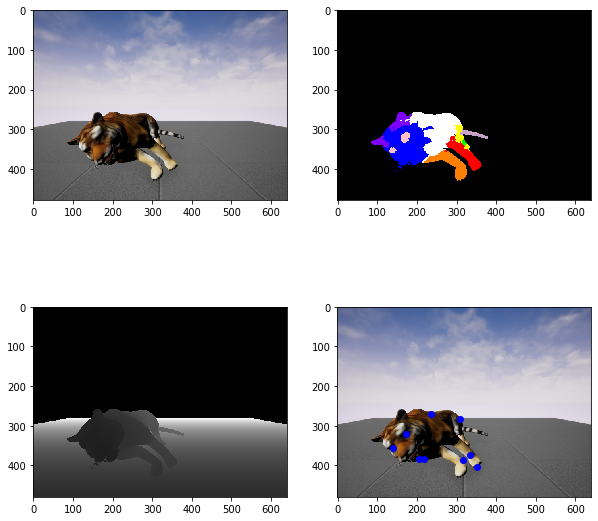

In [2]:
color_mapping = {1: [255,0,0], 2: [203,192,255], 3: [255,0,127], 4: [255,255,255], 5: [0,0,255],
                 6: [0,127,255], 7: [0,255,255], 8: [0,255,0], 9: [200,162,200]}
# head, eye, ear, torso, left_front, right_front, left_back, right_back, tail
frame = np.zeros((256,256,3)).astype(np.uint8)
for j in range(len(paths)):
    
    print("visualize annotations for image: ", paths[j])
    
    img = imageio.imread(paths[j])
    
    plt.figure(figsize=(10, 10))
    # part segmentation
    frame = img.reshape(480,640,1).repeat(3, axis=2)
    for i in range(1,10):
        frame[:,:,0][frame[:,:,0]==i] = color_mapping[i][0]
        frame[:,:,1][frame[:,:,1]==i] = color_mapping[i][1]    
        frame[:,:,2][frame[:,:,2]==i] = color_mapping[i][2]
    ax=plt.subplot(222)
    ax.imshow(frame[:,:,::-1])
    #imageio.imwrite('./vis/' + paths[j].split('/')[-1] , frame[:,:,::-1])
    
    # original image
    img_o = imageio.imread(paths[j][:-11]+'img.png')
    ax=plt.subplot(221)
    ax.imshow(img_o)
    #imageio.imwrite('./vis/' + paths[j].split('/')[-1][:-11]+'img.png' , img_o)
    
    # depth image
    depth = np.load(paths[j][:-11] + 'depth.npy')
    depth[depth>10000] = 0
    ax=plt.subplot(223)
    plt.imshow(depth, cmap = 'gray')
    #imageio.imwrite('./vis/' + paths[j].split('/')[-1][:-11] + 'depth.png' , depth)
    
    # keypoints
    kpts = np.load(paths[j][:-11] + 'kpts.npy').astype(np.float16)
    if global_animal=='horse':
        idxs = np.array([1718,1684,1271,1634,1650,1643,1659,925,392,564,993,726,1585,1556,427,1548,967,877])
    elif global_animal=='tiger':
        idxs = np.array([2753,2679,2032,1451,1287,3085,1632,229,1441,1280,2201,1662,266,158,270,152,219,129])
    ax=plt.subplot(224)
    ax.imshow(img_o)
    
    x = []
    y = []
    for i in range(len(idxs)):
        if kpts[idxs[i]][2]==1:
            x.append(kpts[idxs[i]][0])
            y.append(kpts[idxs[i]][1])

    ax.plot(x, y, 'bo')
    
    plt.show()